In [11]:
import os, sys
import numpy as np
sys.path.append(r"H:\TUM-PC\Dokumente\Projects\campbell_diagram\ansys_apdl_wrapper\ansys_apdl_wrapper")

from ansys_apdl_wrapper import pyAPDL

local_folder = os.getcwd()
base_file_path = r'ansys_apdl_warpper\base_files'
filename = 'base_apdl_script.dat'
filepath = os.path.join(local_folder,base_file_path,filename)
temp_folder_prefix = 'rot_'

apdl = pyAPDL(filepath,temp_folder_prefix)
apdl.set_ansys_apdl_path(r'C:\Program Files\ANSYS Inc\v181\ansys\bin\winx64\ansys181.exe')

def calc_freq(rot_speed):
    
    var_dict = {}
    var_dict['apdl_pre_file'] = 'prep_case3'
    var_dict['file_directory'] = base_file_path
    var_dict['number_of_harmonics'] = 2
    var_dict['number_of_modes'] = 4
    var_dict['rotational_speed'] = rot_speed

    folder = os.path.join(local_folder,'simulations_3')

    apdl.update_input_variables(var_dict)
    apdl.write_apdl_script(folder,rot_speed)

    
    apdl.run_simulation()

    f = apdl.read_frequencies()
    return f

In [12]:
rot_list2 = list(np.arange(200,5000,200))
rot_list = [1]
rot_list.extend(rot_list2)


In [13]:
freq_list = []
for rot in rot_list:
    freq = calc_freq(rot)
    freq_list.append(freq)

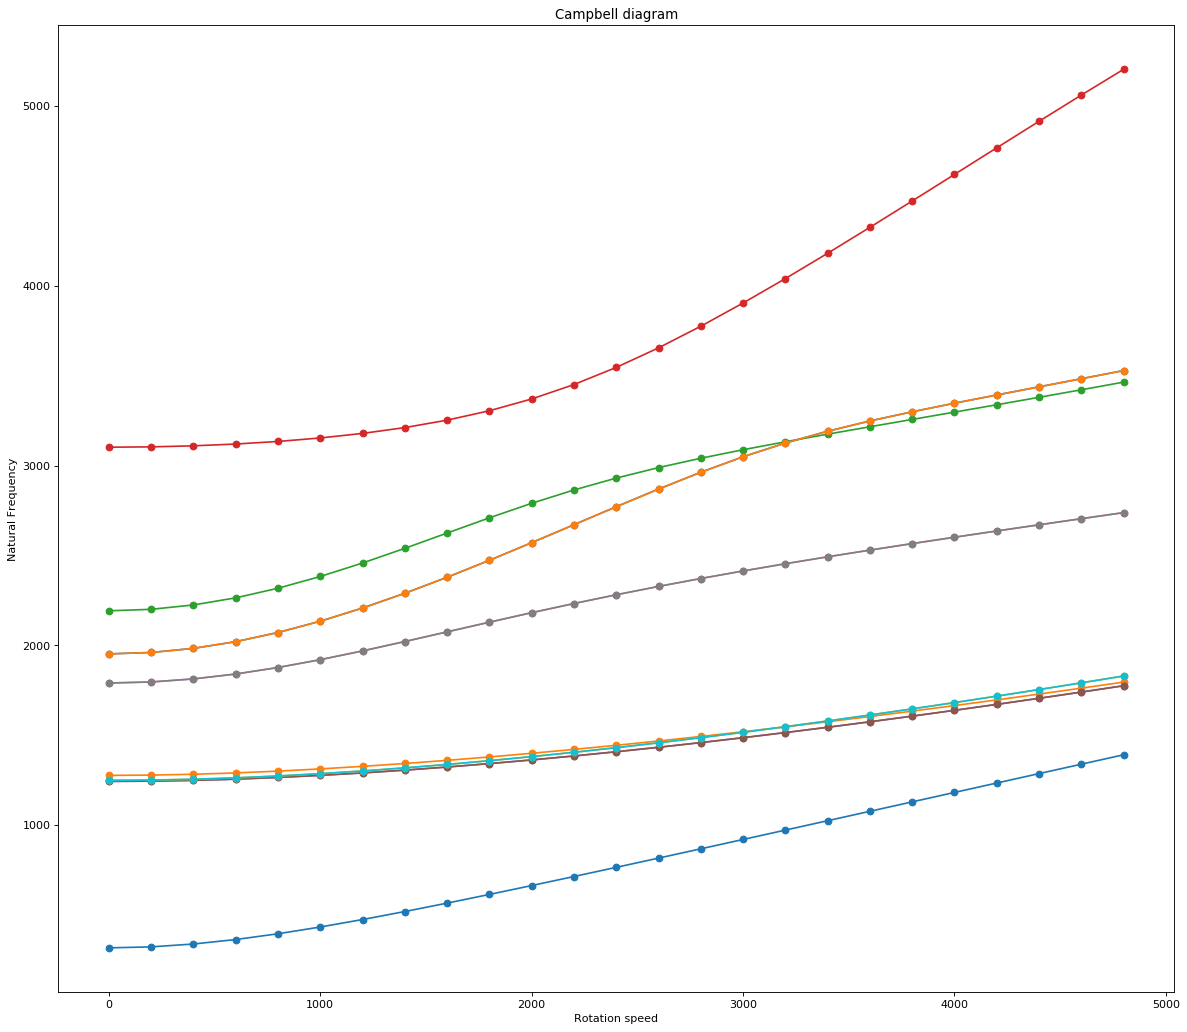

In [18]:
freq = np.matrix(freq_list)
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

for i,freq_i in enumerate(freq_list):
    try:
        plt.plot(rot_list,np.array(freq.T[i]).flatten(),'-o')
    except:
        None

        
plt.ylabel('Natural Frequency')        
plt.xlabel('Rotation speed')
plt.title('Campbell diagram')
plt.show()